# Описание датасета

По заданию используется датасет Daily Climate Time Series, скачанный с ресурса Kaggle. Набор данных содержит ежедневные метеорологические измерения в городе Дели за период с 1 января 2013 года по 1 января 2017 года. Всего в датасете 1462 наблюдения. \
Датасет включает 5 столбцов. Дата измерения (date) – временная метка, используется как индекс, не признак. Средняя температура (meantemp) – значение в градусах Цельсия. Относительная влажность (humidity) в процентах. Скорость ветра (wind_speed) в метрах в секунду. Среднее атмосферное давление (meanpressure). \
Из особенностей датасета – четко выражены сезонные колебания температуры и влажности. Все признаки необходимо проверить на выбросы и пропуски. Также признаки имеют разный масштаб.


# Предобработка данных

Импортируются библиотеки, загружается датасет.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Для вывода информации о данных используется метод .info().

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Датасет содержит 5 столбцов, 1462 наблюдения в каждом столбце, пропусков нет, типы данных для столбцов-признаков верны. Столбец Date имеет тип данных object, что не является корректным типом, необходимо внести изменение типа данных для этого столбца. Также датасет можно отсортировать по столбцу Date.


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.sort_values(by='date', ascending=True, inplace=True)
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Используется функция .describe() для описания числовых признаков.

In [ ]:
data.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


Среднесуточная температура в Дели варьируется в диапазоне от 6,0 до 38,7 градусов Цельсия, что соответствует характерному для данного региона климату. Среднее значение температуры составляет 25,5 при медиане 27,7 говорит о небольшом смещении распределения в сторону более высоких температур. Предположительно, выбросов в данном столбце нет. \
Показатели влажности воздуха находятся в диапазоне от 13,4 до 100, в зависимости от сезона года такие значения имеют место быть. Средний уровень влажности составляет 60,8 при медиане 62,6, что указывает на симметричное распределение. \
Большинство значений скорости ветра находятся в разумных пределах со средним показателем 6,8 и медианой 6,2. Максимальная зарегистрированная скорость 42.22 км/ч соответствует сильному ветру, но не аномальному. \
Наиболее серьезные проблемы в данных обнаружены в показателях атмосферного давления. Диапазон значений варьируется от невозможных -3,04 гПа до аномальных 7679 гПа – это явно свидетельствует о наличии ошибок в данных. При этом среднее значение 1011,1 и медиана 1008,6 соответствуют нормальному атмосферному давлению и практически симметричному распределению данных. Высокое стандартное отклонение 180,2 гПа дополнительно подтверждает наличие значительного количества выбросов. \
Проверка датасета на наличие пропусков с помощью метода .isna() и функции .sum().

In [ ]:
data.isna().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


Пропусков не обнаружено. \
Поиск явных дубликатов в данных с помощью метода duplicated().

In [ ]:
print(data.duplicated().sum())

0


Явные дубликаты не найдены. \
Поиск неявных дубликатов в столбце с датами.

In [ ]:
unique_dates_count = data['date'].nunique()
print(f"Количество уникальных дат: {unique_dates_count}")

Количество уникальных дат: 1462


Количество уникальных значений в столбце с датой равно 1462, что соответствует количеству записей в датасете. Дублирующиеся даты не найдены. \
Строятся графики динамики изменения значений по датам для каждого признака. Это может помочь лучше изучить данные и отследить выбросы. \
Построение графика изменения среднесуточной температуры по датам.

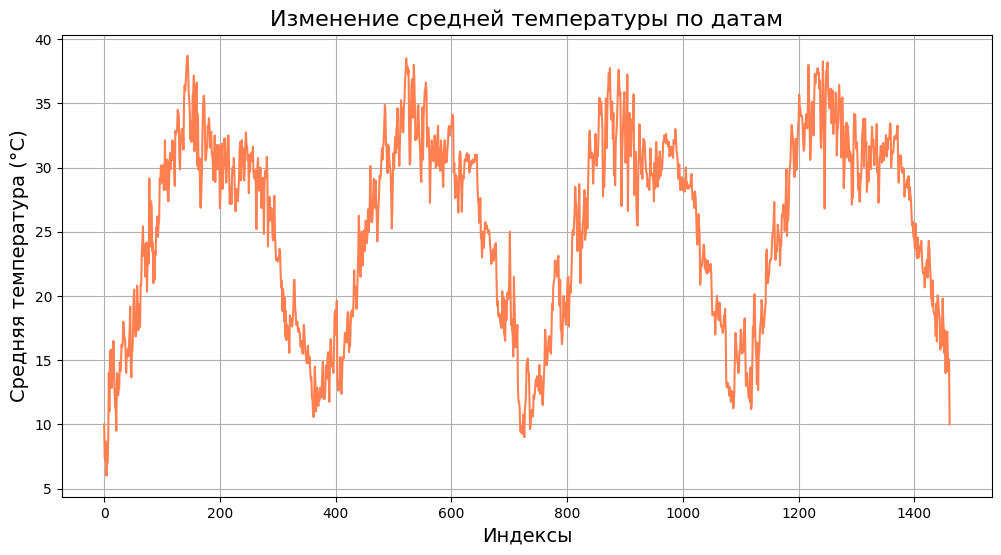

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='meantemp', data=data, color='coral')
plt.title('Изменение средней температуры по датам', fontsize=16)
plt.xlabel('Индексы', fontsize=14)
plt.ylabel('Средняя температура (°C)', fontsize=14)
plt.grid()
plt.show()

Данный график отражает сезонные изменения в наблюдениях. Колебания температуры выглядят вполне обоснованными, выбросов не обнаружено. \
Построение графика изменения влажности по датам.

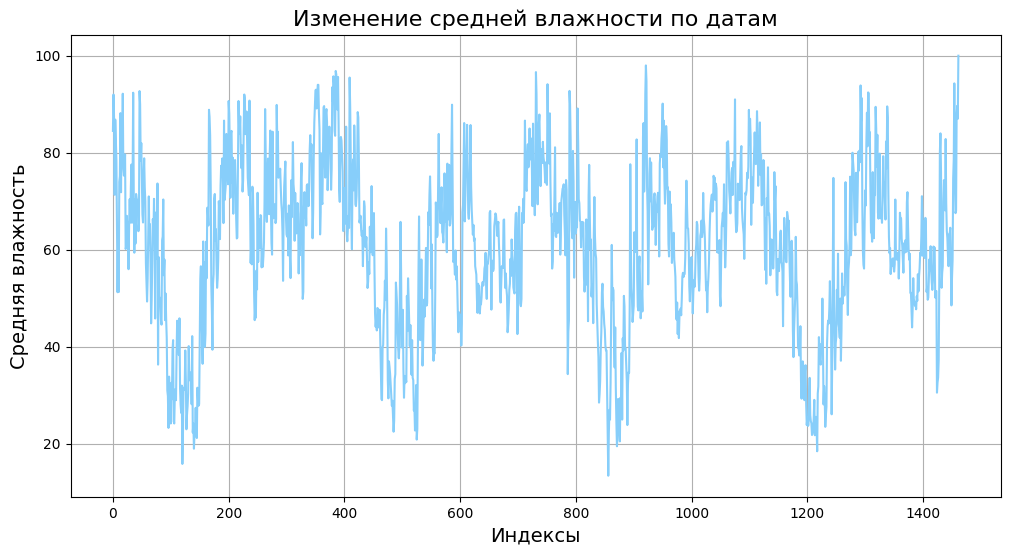

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='humidity', data=data, color='lightskyblue')
plt.title('Изменение средней влажности по датам', fontsize=16)
plt.xlabel('Индексы', fontsize=14)
plt.ylabel('Средняя влажность', fontsize=14)
plt.grid()
plt.show()

Данный график также отражает сезонные изменения в наблюдениях. Колебания влажности выглядят вполне обоснованными, выбросов не обнаружено. \
Построение графика изменения скорости ветра по датам.

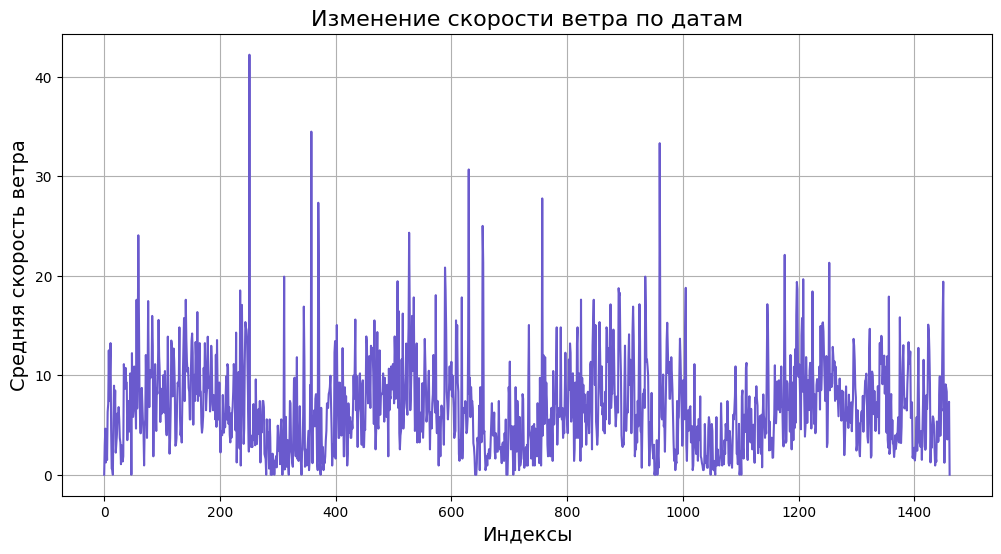

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='wind_speed', data=data, color='slateblue')
plt.title('Изменение скорости ветра по датам', fontsize=16)
plt.xlabel('Индексы', fontsize=14)
plt.ylabel('Средняя скорость ветра', fontsize=14)
plt.grid()
plt.show()

На данном графике можно увидеть резкие скачки в значениях средней скорости ветра. Данные скачки относятся к выбросам. \
Построение графика изменения атмосфреного давления по датам.

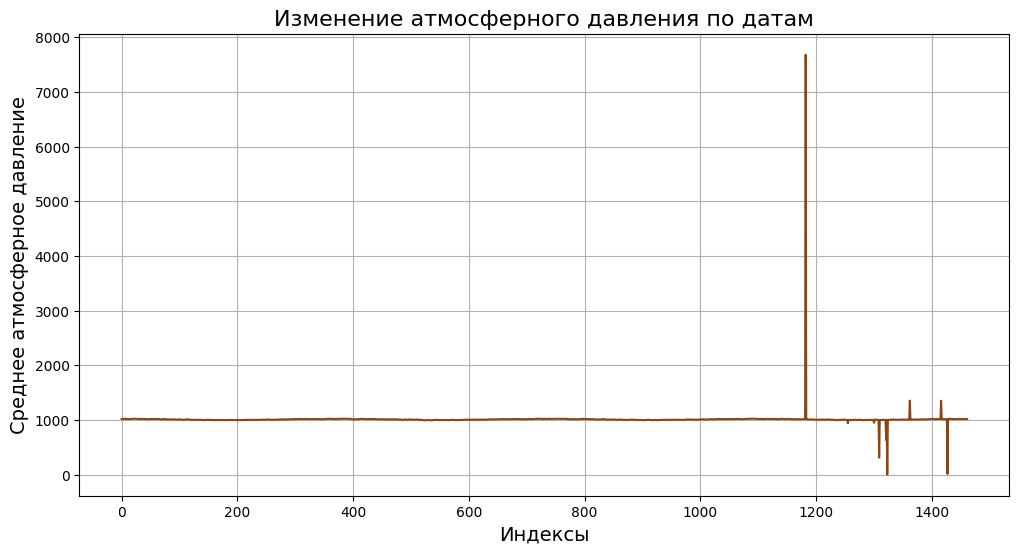

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='meanpressure', data=data, color='saddlebrown')
plt.title('Изменение атмосферного давления по датам', fontsize=16)
plt.xlabel('Индексы', fontsize=14)
plt.ylabel('Среднее атмосферное давление', fontsize=14)
plt.grid()
plt.show()

Данный график показывает, что в среднем значение атмосферного давнеия находится примерно на одном уровне, однако обнаружены резкие скачки - выбросы. \
Далее строится матрица рассеивания, которая также поможет лучше проанализировать данные и подтвердить мнение о выбросах.

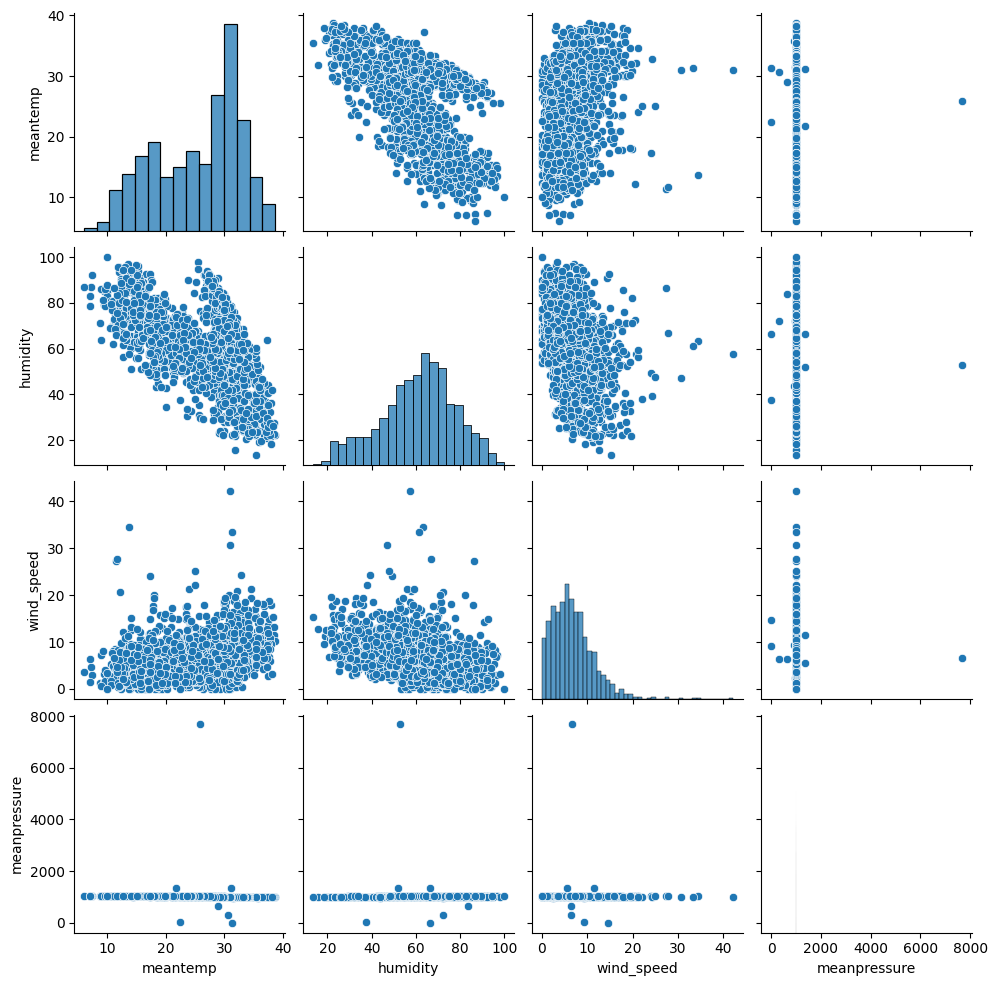

In [ ]:
sns.pairplot(data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.show()

Сильная обратная корреляция между meantemp и humidity, при увеличении температуры влажность снижается. Это логично, в жаркую погоду воздух часто суше. \
Связь wind_speed с другими переменными слабая или отсутствует.
Найдены выбросы, особенно в сочетании с meanpressure. \
Наблюдается наличие выбросов в meanpressure. Самый яркий выброс в meanpressure - значение около 7000, что не соответствует физическим наблюдениям в жизни. \
В wind_speed также есть значения выше 40, что относится к выбросам. \
Такие выбросы необходимо скорректировать. Далее данные разделяются по месяцу в группы и корректируются выбросы внутри каждой группы, чтобы избежать сезонности. Выводятся повтроно графики для каждого из скорректированного столбца.

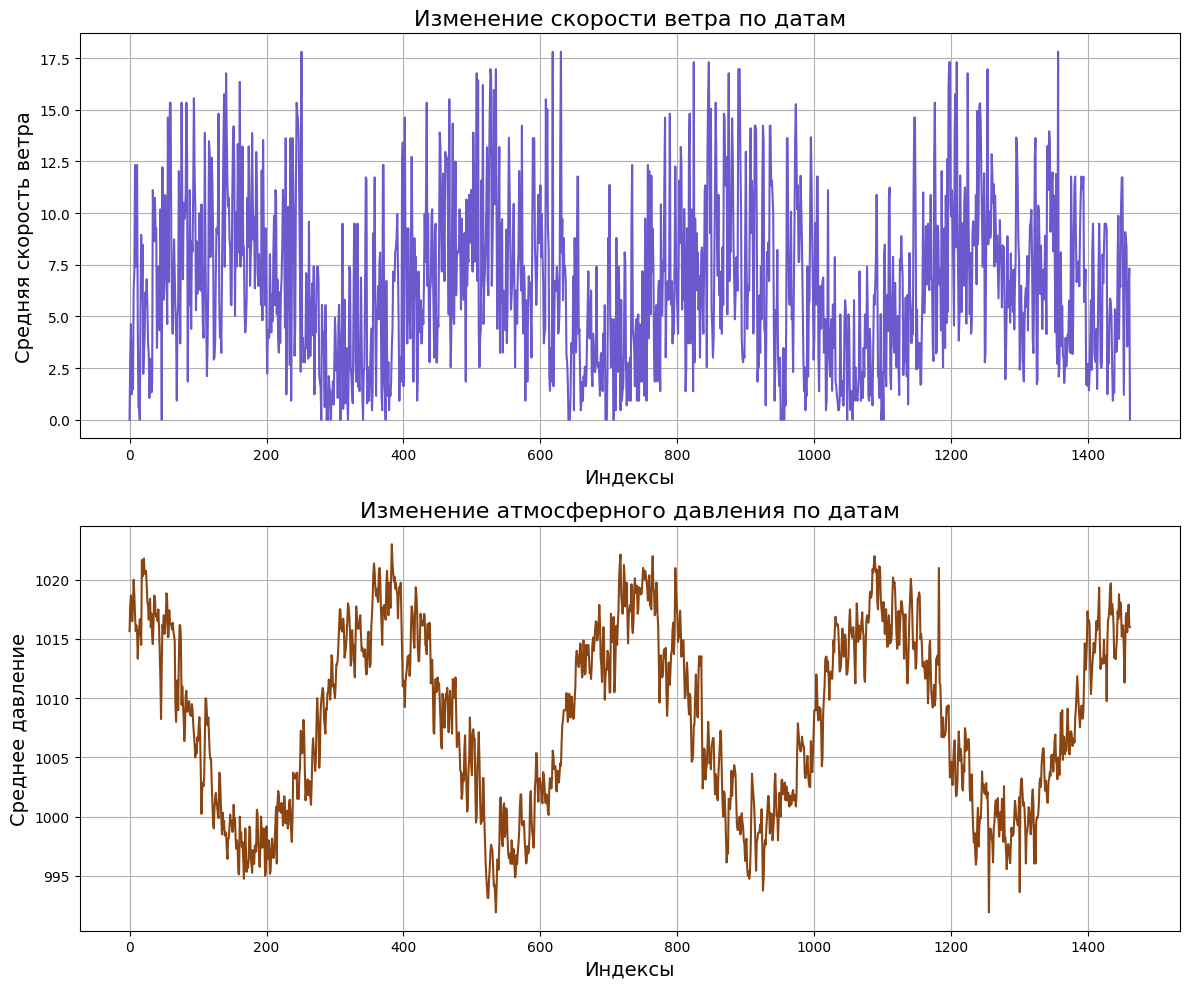

In [ ]:
data['month'] = pd.to_datetime(data['date']).dt.month

def cap_outliers_seasonal(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.15 * IQR
    upper = Q3 + 1.15 * IQR
    return group.clip(lower, upper)

data['meanpressure'] = data.groupby('month')['meanpressure'].transform(cap_outliers_seasonal)
data['wind_speed'] = data.groupby('month')['wind_speed'].transform(cap_outliers_seasonal)

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['wind_speed'], color='slateblue')
plt.title('Изменение скорости ветра по датам', fontsize=16)
plt.xlabel('Индексы', fontsize=14)
plt.ylabel('Средняя скорость ветра', fontsize=14)
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(data.index, data['meanpressure'], color='saddlebrown')
plt.title('Изменение атмосферного давления по датам', fontsize=16)
plt.xlabel('Индексы', fontsize=14)
plt.ylabel('Среднее давление', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

Из графиков видно, что выбросы были скорректированы. \
Далее столбец с датой преобразуется в индекс.

In [ ]:
data_new = data.copy()
data_new.set_index('date', inplace=True)
data_new.sort_index(inplace=True)
data_new

,meantemp,humidity,wind_speed,meanpressure,month
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1
...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,12
2016-12-29,15.238095,87.857143,6.000000,1016.904762,12
2016-12-30,14.095238,89.666667,6.266667,1017.904762,12


Также необходимо учесть временную структуру данных в признаках.

In [ ]:
data_new['day_of_year'] = data_new.index.dayofyear
data_new['day_sin'] = np.sin(2 * np.pi * data_new.index.month/365)
data_new['day_cos'] = np.cos(2 * np.pi * data_new.index.month/365)
data_new

,meantemp,humidity,wind_speed,meanpressure,month,day_of_year,day_sin,day_cos
date,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1,0.017213,0.999852
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2,0.017213,0.999852
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,3,0.017213,0.999852
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,4,0.017213,0.999852
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,5,0.017213,0.999852
...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,12,363,0.205104,0.978740
2016-12-29,15.238095,87.857143,6.000000,1016.904762,12,364,0.205104,0.978740
2016-12-30,14.095238,89.666667,6.266667,1017.904762,12,365,0.205104,0.978740


Далее признаки нормализуются.

In [ ]:
features = data_new[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'day_sin', 'day_cos']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Обучение SOM

Построение и обучение SOM. Размер карты - 10 на 10. Инициализация весов нейронов случайными значениями из обучающих данных.

In [ ]:
!pip install minisom

In [ ]:
som_size = 10

som = MiniSom(
    x=som_size,
    y=som_size,
    input_len=X_scaled.shape[1],
    sigma=1.5,
    learning_rate=0.5,
    neighborhood_function='gaussian',
    random_seed=42
)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=1000)

Извлечение весов нейронов и преобразование их в плоский вид. Кластеризация нейронов с помощью KMeans. Назначение кластера каждой точке данных.

In [ ]:
weights = som.get_weights().reshape(som_size * som_size, -1)

kmeans = KMeans(n_clusters=4, random_state=42)
neuron_labels = kmeans.fit_predict(weights)

bmu_indices = np.array([som.winner(x) for x in X_scaled])
bmu_indices_flat = np.array([i * som_size + j for i, j in bmu_indices])
data['cluster'] = neuron_labels[bmu_indices_flat]

# Карты

Визуализация топографической карты.

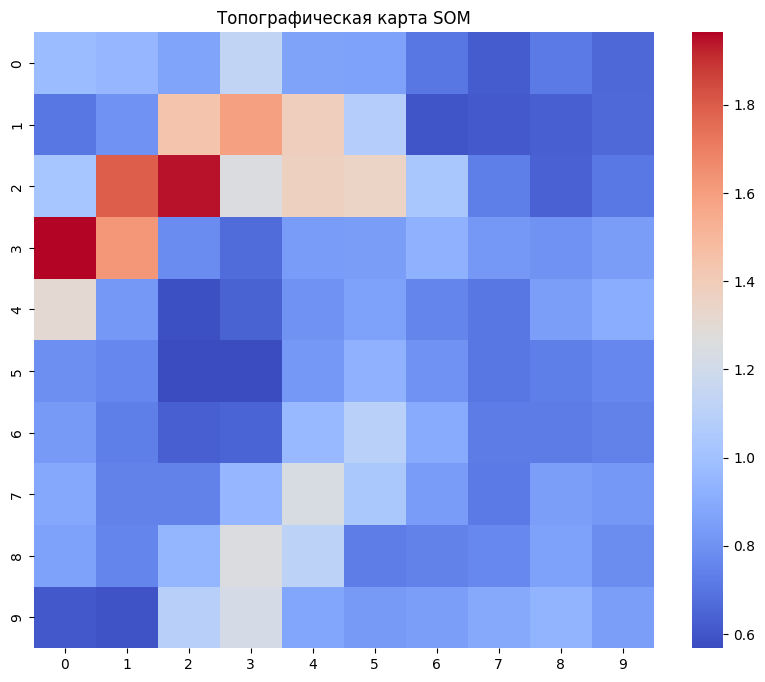

In [ ]:
weights = som.get_weights()
umatrix = np.zeros((som_size, som_size))

for i in range(som_size):
    for j in range(som_size):
        neighbors = []
        if i > 0:
            neighbors.append(weights[i - 1, j])
        if i < som_size - 1:
            neighbors.append(weights[i + 1, j])
        if j > 0:
            neighbors.append(weights[i, j - 1])
        if j < som_size - 1:
            neighbors.append(weights[i, j + 1])

        dists = [np.linalg.norm(weights[i, j] - neighbor) for neighbor in neighbors]
        umatrix[i, j] = np.mean(dists)

plt.figure(figsize=(10, 8))
plt.title('Топографическая карта SOM')
sns.heatmap(umatrix, cmap='coolwarm')
plt.show()

Видно, что в левом верхнем углу присутствуют ярко-красные зоны – резкий переход между разными группами данных. Остальная карта в основном синяя и голубая – это области, где данные меняются плавно и нейроны похожи между собой. \
Визуализация цветовой карты кластеров.

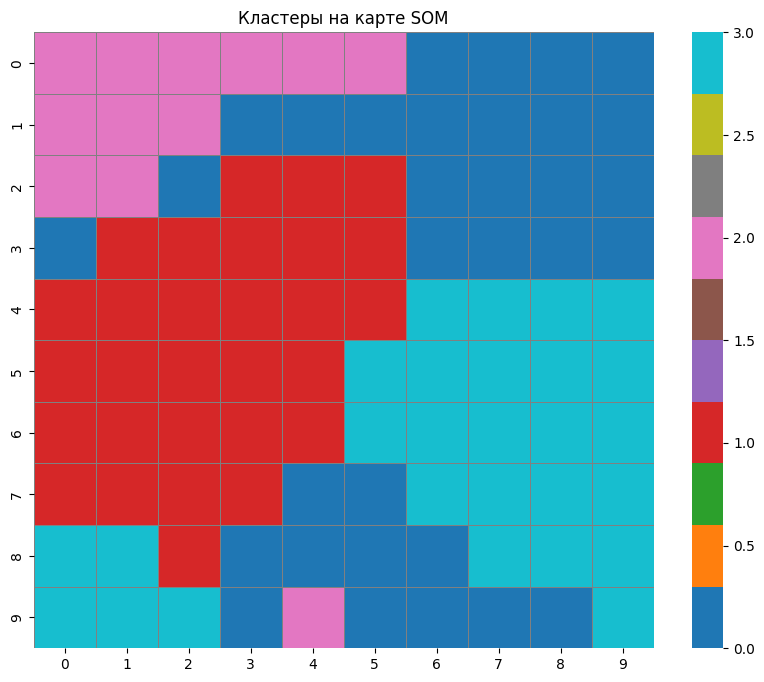

In [ ]:
cluster_map = np.zeros((som_size, som_size))

for idx, (i, j) in enumerate(bmu_indices):
    cluster_map[i, j] = data['cluster'].iloc[idx]

plt.figure(figsize=(10, 8))
plt.title('Кластеры на карте SOM')
sns.heatmap(cluster_map, cmap='tab10', linewidths=0.5, linecolor='gray', cbar=True)
plt.show()

Данная карта показывает, как пространство признаков разбивается на кластеры.

# Оценка качества кластеризации

Оценка качества кластеризации для кластеров SOM с помощью силуэтного коэффициента.

In [ ]:
silhouette = silhouette_score(X_scaled, data['cluster'])
print(f"Silhouette Score для кластеров SOM: {silhouette:.4f}")

Silhouette Score для кластеров SOM: 0.3723


Оценка качества кластеризации для кластеров Kmeans с помощью силуэтного коэффициента.

In [ ]:
kmeans_direct = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_direct.fit_predict(X_scaled)

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score для KMeans: {silhouette_kmeans:.4f}")

Silhouette Score для KMeans: 0.3851


Оба метода SOM и прямой KMeans смогли найти кластерную структуру. Качество кластеров среднее, структура есть, но она не четкая. SOM чуть хуже по силуэту. \
Данныые показатели показывают нормальное качество кластеризации.  Но не идеальное так как, жёстких границ между сезонами нет. Из-за этого границы между кластерами размыты. \
Визуализация распределения кластеров SOM и KMeans.

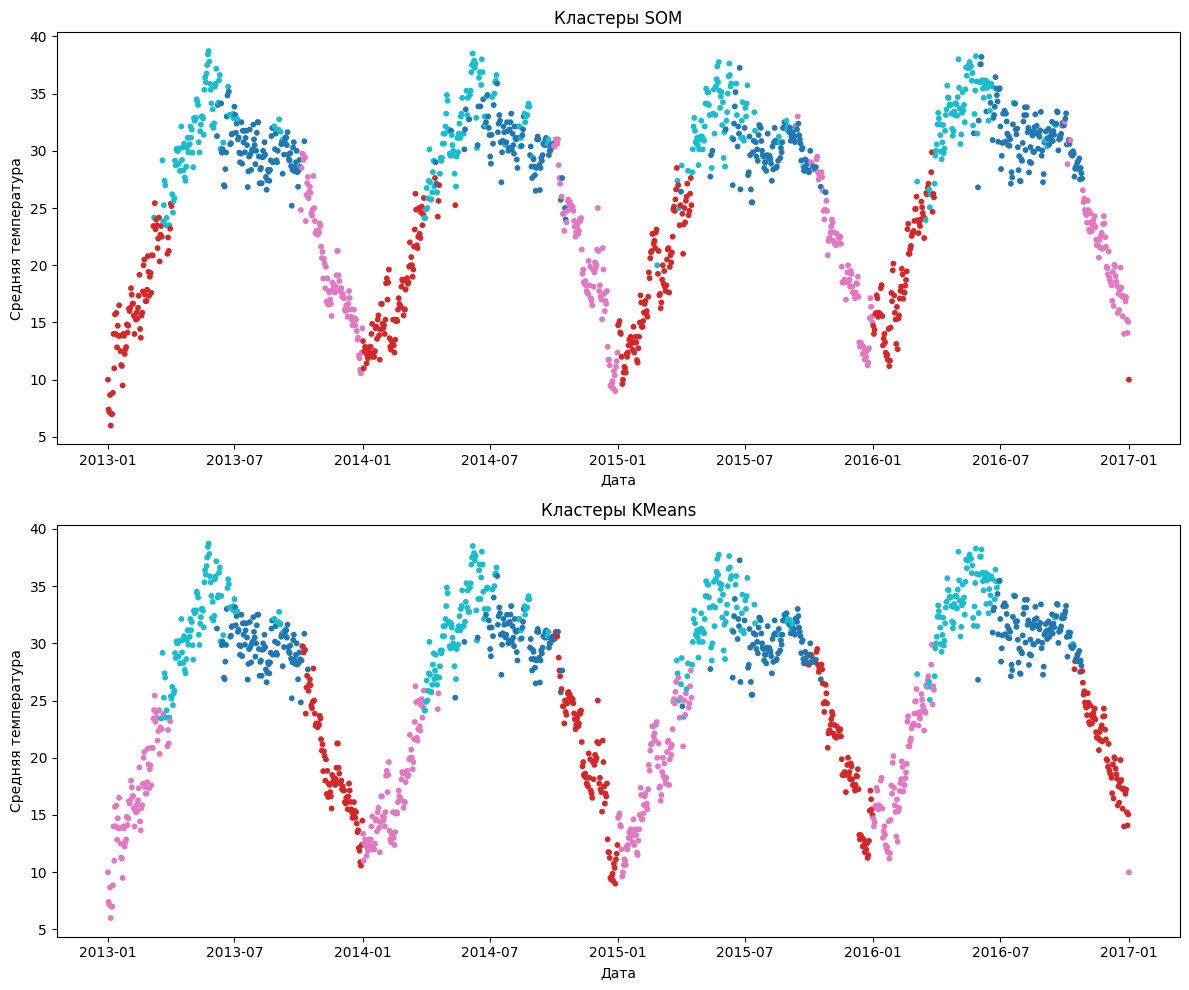

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].scatter(data['date'], data['meantemp'], c=data['cluster'], cmap='tab10', s=10)
axs[0].set_title('Кластеры SOM')

axs[1].scatter(data['date'], data['meantemp'], c=kmeans_labels, cmap='tab10', s=10)
axs[1].set_title('Кластеры KMeans')

for ax in axs:
    ax.set_xlabel('Дата')
    ax.set_ylabel('Средняя температура')

plt.tight_layout()
plt.show()

Кластеры SOM переходят плавно, самые холодные температуры (зима) одним цветом, потом постепенный переход к весне, затем лето и обратно к осени. Нет резких скачков, границы между кластерами мягкие. SOM смог учесть сложные зависимости в температурных данных.
KMeans тоже разделил сезоны, но, увидел более жёсткие границы между кластерами. Частично видно, что в рамках одной температуры разные точки относятся к разным кластерам.